In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 310
BATCH_SIZE = 32
CHANNELS = 1
EPHOCHS = 5

In [3]:
dataset=tf.keras.utils.image_dataset_from_directory(
    "sign", 
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 17113 files belonging to 27 classes.


In [4]:
class_names = dataset.class_names
class_names

['0',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [5]:
len(dataset)

535

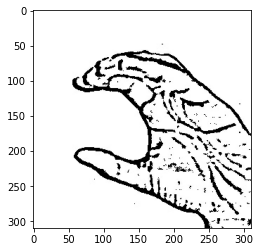

In [6]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [7]:
train_size=0.8
len(dataset)*train_size

428.0

In [8]:
train_ds = dataset.take(428)
len(train_ds)

428

In [9]:
# 80 = training
# 20 = 10 for validation and 10 for test
test_ds = dataset.skip(428)
len(test_ds)

107

In [10]:
validation_size = 0.1
len(dataset)*validation_size

53.5

In [11]:
val_ds = test_ds.take(53)
len(val_ds)

53

In [12]:
test_ds = test_ds.skip(53)
len(test_ds)

54

In [13]:
train_ds =  train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds =  val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds =  test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255),
])

In [15]:
data_augmentation= tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])


In [16]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=27
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 310, 310, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 310, 310, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 308, 308, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 154, 154, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 152, 152, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 76, 76, 64)         0         
 2D)                                                  

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [19]:
history = model.fit(
    train_ds,
    epochs=5,
    batch_size=BATCH_SIZE,
    validation_data=val_ds, 
    verbose=1
)

Epoch 1/5
428/428 [==============================] - 1083s 2s/step - loss: 2.6116 - accuracy: 0.2092 - val_loss: 1.3239 - val_accuracy: 0.5613
Epoch 2/5
428/428 [==============================] - 973s 2s/step - loss: 1.1246 - accuracy: 0.6214 - val_loss: 0.7283 - val_accuracy: 0.7482
Epoch 3/5
428/428 [==============================] - 886s 2s/step - loss: 0.6465 - accuracy: 0.7824 - val_loss: 0.4498 - val_accuracy: 0.8384
Epoch 4/5
428/428 [==============================] - 861s 2s/step - loss: 0.4543 - accuracy: 0.8495 - val_loss: 0.3575 - val_accuracy: 0.8673
Epoch 5/5
428/428 [==============================] - 856s 2s/step - loss: 0.3224 - accuracy: 0.8926 - val_loss: 0.3949 - val_accuracy: 0.8709


In [20]:
scores = model.evaluate(test_ds)

54/54 [==============================] - 57s 483ms/step - loss: 0.4073 - accuracy: 0.8664


In [21]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 428}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Accuracy')

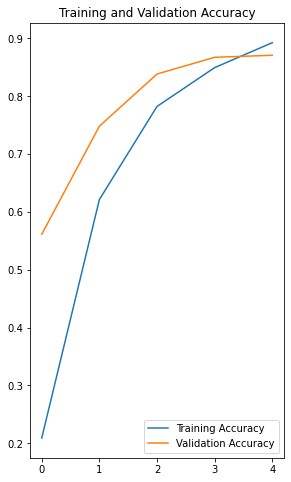

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(5),accuracy,label='Training Accuracy')
plt.plot(range(5),val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



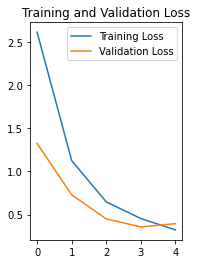

In [26]:
plt.subplot(1,2,2)
plt.plot(range(5),loss,label='Training Loss')
plt.plot(range(5),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
First image actual label: P
Predicted Label: P


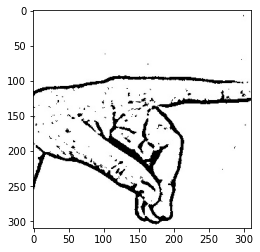

In [35]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    prediction = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class,confidence

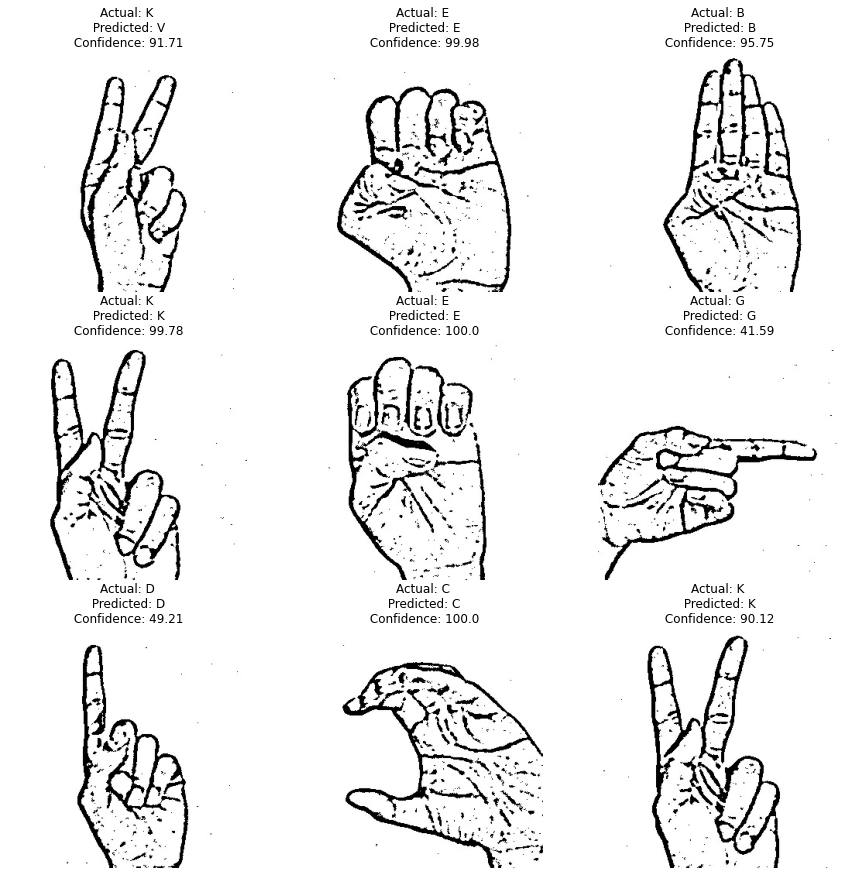

In [37]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}\n Confidence: {confidence}")
        
        plt.axis("off")

In [38]:
model_version = 2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets
